# Hypothesis testing


```{note}
This chapter is adapted from Danielle Navarro's excellent [Learning Statistics with R](https://learningstatisticswithr.com) book and Matt Crump's [Answering Questions with Data](https://crumplab.github.io/statistics/probability-sampling-and-estimation.html).  The main text of Matt's version has mainly be left intact with a few modifications, also the code adapted to use python and jupyter.
```

In [2]:
from IPython.core.display import HTML, Markdown, display

import numpy.random as npr
import numpy as np
import pandas as pd
import seaborn as sns
from cycler import cycler
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
from celluloid import Camera

from myst_nb import glue # for the Jupyter book chapter

>*The process of induction is the process of assuming the simplest law that can be made to harmonize with our experience. This process, however, has no logical foundation but only a psychological one. It is clear that there are no grounds for believing that the simplest course of events will really happen. It is an hypothesis that the sun will rise tomorrow: and this means that we do not know whether it will rise.*
>
>-- Ludwig Wittgenstein [^witt]

[^witt]: The quote comes from Wittgenstein's (1922) text, *Tractatus Logico-Philosphicus*.]

In its most abstract form, hypothesis testing really a very simple idea: the researcher has some theory about the world, and wants to determine whether or not the data actually support that theory. However, the details are messy, and most people find the theory of hypothesis testing to be the most frustrating part of statistics. The structure of the chapter is as follows. Firstly, I'll describe how hypothesis testing works, in a fair amount of detail, using a simple running example to show you how a hypothesis test is "built". I'll try to avoid being too dogmatic while doing so, and focus instead on the underlying logic of the testing procedure. Afterwards, I'll spend a bit of time talking about the various dogmas, rules and heresies that surround the theory of hypothesis testing. [^fisher]

[^fisher]: A technical note. The description below differs subtly from the standard description given in a lot of introductory texts. The orthodox theory of null hypothesis testing emerged from the work of Sir Ronald Fisher and Jerzy Neyman in the early 20th century; but Fisher and Neyman actually had very different views about how it should work. The standard treatment of hypothesis testing that most texts use is a hybrid of the two approaches. The treatment here is a little more Neyman-style than the orthodox view, especially as regards the meaning of the $p$ value.

My apologies to anyone who actually believes in this stuff, but on my reading of the literature on ESP, it's just not reasonable to think this is real. To be fair, though, some of the studies are rigorously designed; so it's actually an interesting area for thinking about psychological research design. And of course it's a free country, so you can spend your own time and effort proving me wrong if you like, but I wouldn't think that's a terribly practical use of your intellect.

## A menagerie of hypotheses

Eventually we all succumb to madness. For me, that day will arrive once I'm finally promoted to full professor. Safely ensconced in my ivory tower, happily protected by tenure, I will finally be able to take leave of my senses (so to speak), and  indulge in that most thoroughly unproductive line of psychological research: the search for extrasensory perception (ESP). 

Let's suppose that this glorious day has come. My first study is a simple one, in which I seek to test whether clairvoyance exists. Each participant sits down at a table, and is shown a card by an experimenter. The card is black on one side and white on the other. The experimenter takes the card away, and places it on a table in an adjacent room. The card is placed black side up or white side up completely at random, with the randomisation occurring only after the experimenter has left the room with the participant. A second experimenter comes in and asks the participant which side of the card is now facing upwards. It's purely a one-shot experiment. Each person sees only one card, and gives only one answer; and at no stage is the participant actually in contact with someone who knows the right answer. My data set, therefore, is very simple. I have asked the question of $N$ people, and some number $X$ of these people have given the correct response. To make things concrete, let's suppose that I have tested $N = 100$ people, and $X = 62$ of these got the answer right... a surprisingly large number, sure, but is it large enough for me to feel safe in claiming I've found evidence for ESP? This is the situation where hypothesis testing comes in useful. However, before we talk about how to *test* hypotheses, we need to be clear about what we mean by hypotheses.

### Research hypotheses versus statistical hypotheses

The first distinction that you need to keep clear in your mind is between  research hypotheses and statistical hypotheses. In my ESP study, my overall scientific goal is to demonstrate that clairvoyance exists. In this situation, I have a clear research goal: I am hoping to discover evidence for ESP. In other situations I might actually be a lot more neutral than that, so I might say that my research goal is to determine whether or not clairvoyance exists. Regardless of how I want to portray myself, the basic point that I'm trying to convey here is that a research hypothesis involves making a substantive, testable scientific claim... if you are a psychologist, then your research hypotheses are fundamentally *about* psychological constructs. Any of the following would count as **_research hypotheses_**:

- *Listening to music reduces your ability to pay attention to other things.* This is a claim about the causal relationship between two psychologically meaningful concepts (listening to music and paying attention to things), so it's a perfectly reasonable research hypothesis.
- *Intelligence is related to personality*. Like the last one, this is a relational claim about two psychological constructs (intelligence and personality), but the claim is weaker: correlational not causal.
- *Intelligence *is* speed of information processing*. This hypothesis has a quite different character: it's not actually a relational claim at all. It's an ontological claim about the fundamental character of intelligence (and I'm pretty sure it's wrong). It's worth expanding on this one actually: It's usually easier to think about how to construct experiments to test research hypotheses of the form "does X affect Y?" than it is to address claims like "what is X?" And in practice, what usually happens is that you find ways of testing relational claims that follow from your ontological ones. For instance, if I believe that intelligence *is* speed of information processing in the brain, my experiments will often involve looking for relationships between measures of intelligence and measures of speed. As a consequence, most everyday research questions do tend to be relational in nature, but they're almost always motivated by deeper ontological questions about the state of nature. 

Notice that in practice, my research hypotheses could overlap a lot. My ultimate goal in the ESP experiment might be to test an ontological claim like "ESP exists", but I might operationally restrict myself to a narrower hypothesis like "Some people can `see' objects in a clairvoyant fashion". That said, there are some things that really don't count as proper research hypotheses in any meaningful sense: 

- *Love is a battlefield*. This is too vague to be testable. While it's okay for a research hypothesis to have a degree of vagueness to it, it has to be possible to operationalise your theoretical ideas. Maybe I'm just not creative enough to see it, but I can't see how this can be converted into any concrete research design. If that's true, then this isn't a scientific research hypothesis, it's a pop song. That doesn't mean it's not interesting -- a lot of deep questions that humans have fall into this category. Maybe one day science will be able to construct testable theories of love, or to test to see if God exists, and so on; but right now we can't, and I wouldn't bet on ever seeing a satisfying scientific approach to either. 
- *The first rule of tautology club is the first rule of tautology club*. This is not a substantive claim of any kind. It's true by definition. No conceivable state of nature could possibly be inconsistent with this claim. As such, we say that this is an unfalsifiable hypothesis, and as such it is outside the domain of science. Whatever else you do in science, your claims must have the possibility of being wrong. 
- *More people in my experiment will say "yes" than "no"*. This one fails as a research hypothesis because it's a claim about the data set, not about the psychology (unless of course your actual research question is whether people have some kind of "yes" bias!). As we'll see shortly, this hypothesis is starting to sound more like a statistical hypothesis than a research hypothesis. 


As you can see, research hypotheses can be somewhat messy at times; and ultimately they are *scientific* claims. **_Statistical hypotheses_** are neither of these two things. Statistical hypotheses must be mathematically precise, and they must correspond to specific claims about the characteristics of the data generating mechanism (i.e., the "population"). Even so, the intent is that statistical hypotheses bear a clear relationship to the substantive research hypotheses that you care about! For instance, in my ESP study my research hypothesis is that some people are able to see through walls or whatever. What I want to do is to "map" this onto a statement about how the data were generated. So let's think about what that statement would be. The quantity that I'm interested in within the experiment is $P(\mbox{"correct"})$, the true-but-unknown probability with which the participants in my experiment answer the question correctly. Let's use the Greek letter $\theta$ (theta) to refer to this probability. Here are four different statistical hypotheses:


- If ESP doesn't exist and if my experiment is well designed, then my participants are just guessing. So I should expect them to get it right half of the time and so my statistical hypothesis is that the true probability of choosing correctly is $\theta = 0.5$. 
- Alternatively, suppose ESP does exist and participants can see the card. If that's true, people will perform better than chance. The statistical hypotheis would be that $\theta > 0.5$. 
- A third possibility is that ESP does exist, but the colours are all reversed and people don't realise it (okay, that's wacky, but you never know...). If that's how it works then you'd expect people's performance to be *below* chance. This would correspond to a statistical hypothesis that $\theta < 0.5$. 
- Finally, suppose ESP exists, but I have no idea whether people are seeing the right colour or the wrong one. In that case, the only claim I could make about the data would be that the probability of making the correct answer is *not* equal to 50. This corresponds to the statistical hypothesis that $\theta \neq 0.5$. 

All of these are legitimate examples of a statistical hypothesis because they are statements about a population parameter and are meaningfully related to my experiment.

What this discussion makes clear, I hope, is that when attempting to construct a statistical hypothesis test the researcher actually has two quite distinct hypotheses to consider. First, he or she has a research hypothesis (a claim about psychology), and this corresponds to a statistical hypothesis (a claim about the data generating population). In my ESP example, these might be

Dan's research hypothesis | Dan's statistical hypothesis
--------------| -------------------
ESP exists | $\theta \neq 0.5$

And the key thing to recognise is this: *a statistical hypothesis test is a test of the statistical hypothesis, not the research hypothesis*. If your study is badly designed, then the link between your research hypothesis and your statistical hypothesis is broken. To give a silly example, suppose that my ESP study was conducted in a situation where the participant can actually see the card reflected in a window; if that happens, I would be able to find very strong evidence that $\theta \neq 0.5$, but this would tell us nothing about whether "ESP exists". 



### Null hypotheses and alternative hypotheses

So far, so good. I have a research hypothesis that corresponds to what I want to believe about the world, and I can map it onto a statistical hypothesis that corresponds to what I want to believe about how the data were generated. It's at this point that things get somewhat counterintuitive for a lot of people. Because what I'm about to do is invent a new statistical hypothesis (the "null" hypothesis, $H_0$) that corresponds to the exact opposite of what I want to believe, and then focus exclusively on that, almost to the neglect of the thing I'm actually interested in (which is now called the "alternative" hypothesis, $H_1$). In our ESP example, the  null hypothesis is that $\theta = 0.5$, since that's what we'd expect if ESP *didn't* exist. My hope, of course, is that ESP is totally real, and so the *alternative* to this null hypothesis is $\theta \neq 0.5$. In essence, what we're doing here is dividing up the possible values of $\theta$ into two groups: those values that I really hope aren't true (the null), and those values that I'd be happy with if they turn out to be right (the alternative). Having done so, the important thing to recognise is that the goal of a hypothesis test is *not* to show that the alternative hypothesis is (probably) true; the goal is to show that the null hypothesis is (probably) false. Most people find this pretty weird. 





This analogy only works if you're from an adversarial legal system like UK/US/Australia. As I understand these things, the French inquisitorial system is quite different.

The best way to think about it, in my experience, is to imagine that a hypothesis test is a criminal trial... *the trial of the null hypothesis*. The null hypothesis is the defendant, the researcher is the prosecutor, and the statistical test itself is the judge. Just like a criminal trial, there is a presumption of innocence: the null hypothesis is *deemed* to be true unless you, the researcher, can prove beyond a reasonable doubt that it is false. You are free to design your experiment however you like (within reason, obviously!), and your goal when doing so is to maximise the chance that the data will yield a conviction... for the crime of being false. The catch is that the statistical test sets the rules of the trial, and those rules are designed to protect the null hypothesis -- specifically to ensure that if the null hypothesis is actually true, the chances of a false conviction are guaranteed to be low. This is pretty important: after all, the null hypothesis doesn't get a lawyer. And given that the researcher is trying desperately to prove it to be false, *someone* has to protect it.  

An aside regarding the language you use to talk about hypothesis testing. Firstly, one thing you really want to avoid is the word "prove": a statistical test really doesn't *prove* that a hypothesis is true or false. Proof implies certainty, and as the saying goes, statistics means never having to say you're certain. On that point almost everyone would agree. However, beyond that there's a fair amount of confusion. Some people argue that you're only allowed to make statements like "rejected the null", "failed to reject the null", or possibly "retained the null". According to this line of thinking, you can't say things like "accept the alternative" or "accept the null". Personally I think this is too strong: in my opinion, this conflates null hypothesis testing with Karl Popper's falsificationist view of the scientific process. While there are similarities between falsificationism and null hypothesis testing, they aren't equivalent. However, while I personally think it's fine to talk about accepting a hypothesis (on the proviso that "acceptance" doesn't actually mean that it's necessarily true, especially in the case of the null hypothesis), many people will disagree. And more to the point, you should be aware that this particular weirdness exists, so that you're not caught unawares by it when writing up your own results.

## Two types of errors

Before going into details about how a statistical test is constructed, it's useful to understand the philosophy behind it. I hinted at it when pointing out the similarity between a null hypothesis test and a criminal trial, but I should now be explicit. Ideally, we would like to construct our test so that we never make any errors. Unfortunately, since the world is messy, this is never possible. Sometimes you're just really unlucky: for instance, suppose you flip a coin 10 times in a row and it comes up heads all 10 times. That feels like very strong evidence that the coin is biased (and it is!), but of course there's a 1 in 1024 chance that this would happen even if the coin was totally fair. In other words, in real life we *always* have to accept that there's a chance that we did the wrong thing. As a consequence, the goal behind statistical hypothesis testing is not to *eliminate* errors, but to *minimise* them.

At this point, we need to be a bit more precise about what we mean by "errors". Firstly,  let's state the obvious: it is either the case that the null hypothesis is true, or it is false; and our test will either reject the null hypothesis or retain it. So, as the table below illustrates, after we run the test and make our choice, one of four things might have happened:


- | retain $H_0$ | reject $H_0$  
--- | ----| ----  
$H_0$ is true  | correct decision | error (type I)
$H_0$ is false | error (type II)   | correct decision


As a consequence there are actually *two* different types of error here. If we reject a null hypothesis that is actually true, then we have made a **_type I error_**. On the other hand, if we retain the null hypothesis when it is in fact false, then we have made a **_type II error_**. 

Remember how I said that statistical testing was kind of like a criminal trial? Well, I meant it. A criminal trial requires that you establish "beyond a reasonable doubt" that the defendant did it. All of the evidentiary rules are (in theory, at least) designed to ensure that there's (almost) no chance of wrongfully convicting an innocent defendant. The trial is designed to protect the rights of a defendant: as the English jurist William Blackstone famously said, it is "better that ten guilty persons escape than that one innocent suffer." In other words, a criminal trial doesn't treat the two types of error in the same way~... punishing the innocent is deemed to be much worse than letting the guilty go free. A statistical test is pretty much the same: the single most important design principle of the test is to *control* the probability of a type I error, to keep it below some fixed probability. This probability, which is denoted $\alpha$, is called the **_significance level_** of the test (or sometimes, the *size* of the test). And I'll say it again, because it is so central to the whole set-up~... a hypothesis test is said to have significance level $\alpha$ if the type I error rate is no larger than $\alpha$. 

So, what about the type II error rate? Well, we'd also like to keep those under control too, and we denote this probability by $\beta$. However, it's much more common to refer to the  **_power_** of the test, which is the probability with which we reject a null hypothesis when it really is false, which is $1-\beta$. To help keep this straight, here's the same table again, but with the relevant numbers added:



- | retain $H_0$ | reject $H_0$  
--- | ----| ----  
$H_0$ is true  | $1-\alpha$ (probability of correct retention) | $\beta$ (type II error rate)
$H_0$ is false | $\alpha$ (type I error rate)   | $1-\beta$  (power of the test)




A "powerful" hypothesis test is one that has a small value of $\beta$, while still keeping $\alpha$ fixed at some (small) desired level. By convention, scientists make use of three different $\alpha$ levels: $.05$, $.01$ and $.001$. Notice the asymmetry here~... the tests are designed to *ensure* that the $\alpha$ level is kept small, but there's no corresponding guarantee regarding $\beta$. We'd certainly *like* the type II error rate to be small, and we try to design tests that keep it small, but this is very much secondary to the overwhelming need to control the type I error rate. As Blackstone might have said if he were a statistician, it is "better to retain 10 false null hypotheses than to reject a single true one". To be honest, I don't know that I agree with this philosophy -- there are situations where I think it makes sense, and situations where I think it doesn't -- but that's neither here nor there. It's how the tests are built.




## Test statistics and sampling distributions

At this point we need to start talking specifics about how a hypothesis test is constructed. To that end, let's return to the ESP example. Let's ignore the actual data that we obtained, for the moment, and think about the structure of the experiment. Regardless of what the actual numbers are, the *form* of the data is that $X$ out of $N$ people correctly identified the colour of the hidden card. Moreover, let's suppose for the moment that the null hypothesis really is true: ESP doesn't exist, and the true probability that anyone picks the correct colour is exactly $\theta = 0.5$. What would we *expect* the data to look like? Well, obviously, we'd expect the proportion of people who make the correct response to be pretty close to 50\%. Or, to phrase this in more mathematical terms, we'd say that $X/N$ is approximately $0.5$. Of course, we wouldn't expect this fraction to be *exactly* 0.5: if, for example we tested $N=100$ people, and $X = 53$ of them got the question right, we'd probably be forced to concede that the data are quite consistent with the null hypothesis. On the other hand, if $X = 99$ of our participants got the question right, then we'd feel pretty confident that the null hypothesis is wrong. Similarly, if only $X=3$ people got the answer right, we'd be similarly confident that the null was wrong. Let's be a little more technical about this: we have a quantity $X$ that we can calculate by looking at our data; after looking at the value of $X$, we make a decision about whether to believe that the null hypothesis is correct, or to reject the null hypothesis in favour of the alternative. The name for this thing that we calculate to guide our choices is a **_test statistic_**. 


Having chosen a test statistic, the next step is to state precisely which values of the test statistic would cause is to reject the null hypothesis, and which values would cause us to keep it. In order to do so, we need to determine what the **_sampling distribution of the test statistic_** would be if the null hypothesis were actually true. Why do we need this? Because this distribution tells us exactly what values of $X$ our null hypothesis would lead us to expect. And therefore, we can use this distribution as a tool for assessing how closely the null hypothesis agrees with our data. 

 



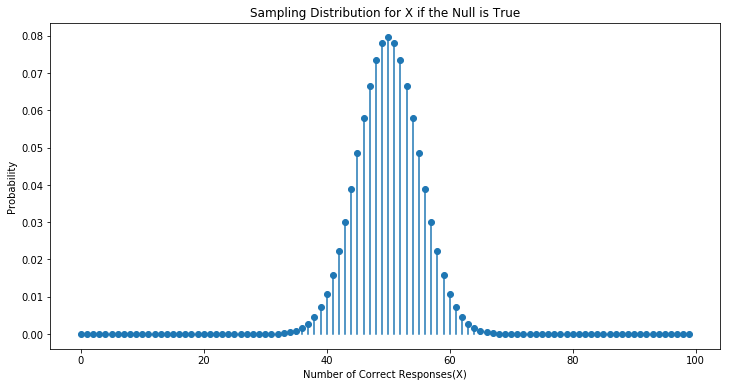

In [6]:
x=np.arange(0,100)
y=stats.binom.pmf(k=x, n=100, p=0.5)
fig=plt.figure(figsize=(12, 6))
plt.stem(x,y, basefmt=" ")
plt.ylabel("Probability")
plt.xlabel("Number of Correct Responses(X)")
plt.title("Sampling Distribution for X if the Null is True")
#plt.show()

glue("sampdist_fig",fig,display=False)

```{glue:figure} sampdist_fig
:figwidth: 550px
:name: "fig:samp_dist"

The sampling distribution for our test statistic $X$ when the null hypothesis is true. For our ESP scenario, this is a binomial distribution. Not surprisingly, since the null hypothesis says that the probability of a correct response is $\\theta = .5$, the sampling distribution says that the most likely value is 50 (our of 100) correct responses. Most of the probability mass lies between 40 and 60.
```

How do we actually determine the sampling distribution of the test statistic? For a lot of hypothesis tests this step is actually quite complicated, and later on in the book you'll see me being slightly evasive about it for some of the tests (some of them I don't even understand myself). However, sometimes it's very easy. And, fortunately for us, our ESP example provides us with one of the easiest cases. Our population parameter $\theta$ is just the overall probability that people respond correctly when asked the question, and our test statistic $X$ is the *count* of the number of people who did so, out of a sample size of $N$.  This is exactly what the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) describes! So, to use the notation and terminology that I introduced in that section, we would say that the null hypothesis predicts that $X$ is binomially distributed, which is written
$
X \sim \mbox{Binomial}(\theta,N)
$
Since the null hypothesis states that $\theta = 0.5$ and our experiment has $N=100$ people, we have the sampling distribution we need. This sampling distribution is plotted in {numref}`fig:samp_dist`. No surprises really: the null hypothesis says that $X=50$ is the most likely outcome, and it says that we're almost certain to see somewhere between 40 and 60 correct responses.

## Making decisions


Okay, we're very close to being finished. We've constructed a test statistic ($X$), and we chose this test statistic in such a way that we're pretty confident that if $X$ is close to $N/2$ then we should retain the null, and  if not we should reject it. The question that remains is this: exactly which values of the test statistic should we associate with the null hypothesis, and which exactly values go with the alternative hypothesis? In my ESP study, for example, I've observed a value of $X=62$. What decision should I make? Should I choose to believe the null hypothesis, or the alternative hypothesis?



### Critical regions and critical values

To answer this question, we need to introduce the concept of a **_critical region_** for the test statistic $X$. The critical region of the test corresponds to those values of $X$ that would lead us to reject null hypothesis (which is why the critical region is also sometimes called the rejection region). How do we find this critical region? Well, let's consider what we know: 

- $X$ should be very big or very small in order to reject the null hypothesis.
- If the null hypothesis is true, the sampling distribution of $X$ is Binomial$(0.5, N)$.
- If $\alpha =.05$, the critical region must cover 5\% of this sampling distribution. 

It's important to make sure you understand this last point: the critical region corresponds to those values of $X$ for which we would reject the null hypothesis, and the sampling distribution in question describes the probability that we would obtain a particular value of $X$ if the null hypothesis were actually true. Now, let's suppose that we chose a critical region that covers 20\% of the sampling distribution, and suppose that the null hypothesis is actually true. What would be the probability of incorrectly rejecting the null? The answer is of course 20\%. And therefore, we would have built a test that had an $\alpha$ level of $0.2$. If we want $\alpha = .05$, the critical region is only *allowed* to cover 5\% of the sampling distribution of our test statistic.



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

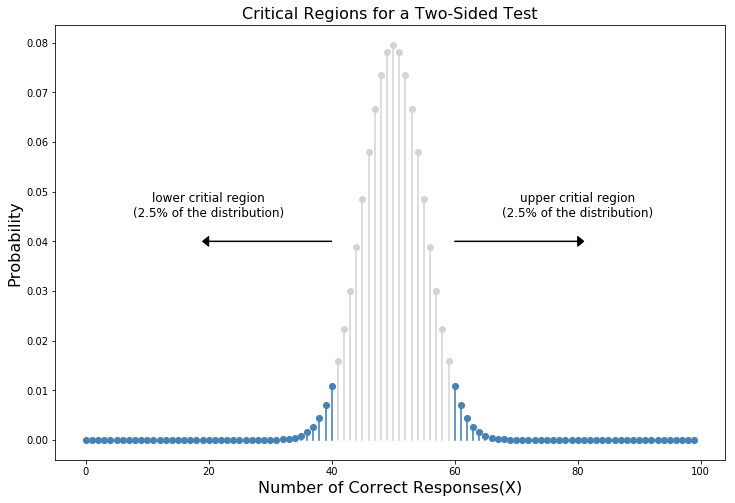

In [9]:
x=np.arange(0,100)
y=stats.binom.pmf(k=x, n=100, p=0.5)
x2=x[np.logical_or(x<=40, x>=60)]
z=stats.binom.pmf(k=x2, n=100, p=0.5)
fig=plt.figure(figsize=(12, 8))
#ax.set_prop_cycle(custom_cycler)
markerline, stemlines, baseline = plt.stem(x,y, markerfmt='o', basefmt=" ")
plt.setp(markerline, 'color', 'lightgrey')
plt.setp(stemlines, 'color', 'lightgrey')
markerline, stemlines, baseline = plt.stem(x2,z, markerfmt='o', basefmt=" ")
plt.setp(markerline, 'color', 'steelblue')
plt.setp(stemlines, 'color', 'steelblue')

plt.arrow(x=60, y=0.04, dx=20, dy=0,width=0.0001,head_width=0.002, head_length=1,color='k',capstyle='butt')
plt.arrow(x=40, y=0.04, dx=-20, dy=0,width=0.0001,head_width=0.002, head_length=1,color='k')
plt.text(80,0.045,"upper critial region\n(2.5% of the distribution)",horizontalalignment='center',fontsize=12)
plt.text(20,0.045,"lower critial region\n(2.5% of the distribution)", horizontalalignment='center',fontsize=12)
#plt.annotate("upper critical region", xy=(60, 0.04), xytext=(80, 0.04), arrowprops=dict(arrowstyle="->"))

plt.ylabel("Probability",fontsize=16)
plt.xlabel("Number of Correct Responses(X)",fontsize=16)
plt.title("Critical Regions for a Two-Sided Test",fontsize=16)
#plt.show()

glue("critregion_fig",fig,display=False)

```{glue:figure} critregion_fig
:figwidth: 550px
:name: "fig:critregion"

The critical region associated with the hypothesis test for the ESP study, for a hypothesis test with a significance level of $\alpha = .05$. The plot itself shows the sampling distribution of $X$ under the null hypothesis: the grey bars correspond to those values of $X$ for which we would retain the null hypothesis. The black bars show the critical region: those values of $X$ for which we would reject the null. Because the alternative hypothesis is two sided (i.e., allows both $\theta <.5$ and $\\theta >.5$), the critical region covers both tails of the distribution. To ensure an $\alpha$ level of $.05$, we need to ensure that each of the two regions encompasses 2.5% of the sampling distribution.
```

As it turns out, those three things uniquely solve the problem: our critical region consists of the most *extreme values*, known as the **_tails_** of the distribution. This is illustrated in {numref}`fig:critregion`. As it turns out, if we want $\alpha = .05$, then our critical regions correspond to $X \leq 40$ and $X \geq 60$.  That is, if the number of people saying "true" is between 41 and 59, then we should retain the null hypothesis. If the number is between 0 to 40 or between 60 to 100, then we should reject the null hypothesis. The numbers 40 and 60 are often referred to as the **_critical values_**, since they define the edges of the critical region [^minor].

[^minor]: Strictly speaking, the test I just constructed has $\alpha = .057$, which is a bit too generous. However, if I'd chosen 39 and 61 to be the boundaries for the critical region, then the critical region only covers 3.5\% of the distribution. I figured that it makes more sense to use 40 and 60 as my critical values, and be willing to tolerate a 5.7\% type I error rate, since that's as close as I can get to a value of $\alpha = .05$.

At this point, our hypothesis test is essentially complete: (1) we choose an $\alpha$ level (e.g., $\alpha = .05$, (2) come up with some test statistic (e.g., $X$) that does a good job (in some meaningful sense) of comparing $H_0$ to $H_1$, (3) figure out the sampling distribution of the test statistic on the assumption that the null hypothesis is true (in this case, binomial) and then (4) calculate the critical region that produces an appropriate $\alpha$ level (0-40 and 60-100). All that we have to do now is calculate the value of the test statistic for the real data (e.g., $X = 62$) and then compare it to the critical values to make our decision. Since 62 is greater than the critical value of 60, we would reject the null hypothesis. Or, to phrase it slightly differently, we say that the test has produced a **_significant_** result. 

### A note on statistical "significance"

>*Like other occult techniques of divination, the statistical method has a private jargon deliberately contrived to obscure its methods from non-practitioners.*
>
>-- Attributed to G. O. Ashley^[The internet seems fairly convinced that Ashley said this, though I can't for the life of me find anyone willing to give a source for the claim.]

A very brief digression is in order at this point, regarding the word "significant". The concept of statistical significance is actually a very simple one, but has a very unfortunate name. If the data allow us to reject the null hypothesis, we say that "the result is *statistically significant*", which is often shortened to "the result is significant". This terminology is rather old, and dates back to a time when "significant" just meant something like "indicated", rather than its modern meaning, which is much closer to "important". As a result, a lot of modern readers get very confused when they start learning statistics, because they think that a "significant result" must be an important one. It doesn't mean that at all. All that "statistically significant" means is that the data allowed us to reject a null hypothesis. Whether or not the result is actually important in the real world is a very different question, and depends on all sorts of other things. 



### The difference between one sided and two sided tests


There's one more thing I want to point out about the hypothesis test that I've just constructed. If we take a moment to think about the statistical hypotheses I've been using, 

$
\begin{array}{cc}
H_0 : & \theta = .5 \\
H_1 : & \theta \neq .5 
\end{array}
$

we notice that the alternative hypothesis covers *both* the possibility that $\theta < .5$ and the possibility that $\theta > .5$. This makes sense if I really think that ESP could produce better-than-chance performance *or* worse-than-chance performance (and there are some people who think that). In statistical language, this is an example of a **_two-sided test_**. It's called this because the alternative hypothesis covers the area on both "sides" of the null hypothesis, and as a consequence the critical region of the test covers both tails of the sampling distribution (2.5\% on either side if $\alpha =.05$), as illustrated earlier in {numref}`fig:critregion`. 

However, that's not the only possibility. It might be the case, for example, that I'm only willing to believe in ESP if it produces better than chance performance. If so, then my alternative hypothesis would only covers the possibility that $\theta > .5$, and as a consequence the null hypothesis now becomes $\theta \leq .5$:

$
\begin{array}{cc}
H_0 : & \theta \leq .5 \\
H_1 : & \theta > .5 
\end{array}
$

When this happens, we have what's called a **_one-sided test_**, and when this happens the critical region only covers one tail of the sampling distribution. This is illustrated in {numref}`fig:critregiononeside`.

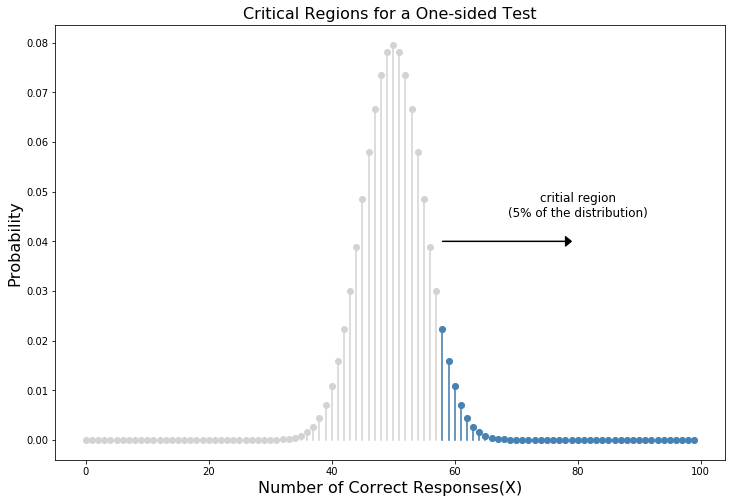

In [12]:
x=np.arange(0,100)
y=stats.binom.pmf(k=x, n=100, p=0.5)
x2=x[x>=58]
z=stats.binom.pmf(k=x2, n=100, p=0.5)
fig=plt.figure(figsize=(12, 8))
#ax.set_prop_cycle(custom_cycler)
markerline, stemlines, baseline = plt.stem(x,y, markerfmt='o', basefmt=" ")
plt.setp(markerline, 'color', 'lightgrey')
plt.setp(stemlines, 'color', 'lightgrey')
markerline, stemlines, baseline = plt.stem(x2,z, markerfmt='o', basefmt=" ")
plt.setp(markerline, 'color', 'steelblue')
plt.setp(stemlines, 'color', 'steelblue')

plt.arrow(x=58, y=0.04, dx=20, dy=0,width=0.0001,head_width=0.002, head_length=1,color='k',capstyle='butt')
plt.text(80,0.045,"critial region\n(5% of the distribution)",horizontalalignment='center',fontsize=12)

plt.ylabel("Probability",fontsize=16)
plt.xlabel("Number of Correct Responses(X)",fontsize=16)
plt.title("Critical Regions for a One-sided Test",fontsize=16)

glue("critregiononeside_fig",fig,display=False)

```{glue:figure} critregiononeside_fig
:figwidth: 550px
:name: "fig:critregiononeside"

The critical region for a one sided test. In this case, the alternative hypothesis is that $\\theta > .05$, so we would only reject the null hypothesis for large values of $X$. As a consequence, the critical region only covers the upper tail of the sampling distribution; specifically the upper 5% of the distribution. Contrast this to the two-sided version earlier).
```

## The $p$ value of a test

In one sense, our hypothesis test is complete; we've constructed a test statistic, figured out its sampling distribution if the null hypothesis is true, and then constructed the critical region for the test. Nevertheless, I've actually omitted the most important number of all: **_the $p$ value_**. It is to this topic that we now turn. There are two somewhat different ways of interpreting a $p$ value, one proposed by Sir Ronald Fisher and the other by Jerzy Neyman. Both versions are legitimate, though they reflect very different ways of thinking about hypothesis tests. Most introductory textbooks tend to give Fisher's version only, but I think that's a bit of a shame. To my mind, Neyman's version is cleaner, and actually better reflects the logic of the null hypothesis test. You might disagree though, so I've included both. I'll start with Neyman's version...



### A softer view of decision making

One problem with the hypothesis testing procedure that I've described is that it makes no distinction at all between a result this "barely significant" and those that are "highly significant". For instance, in my ESP study the data I obtained only just fell inside the critical region - so I did get a significant effect, but was a pretty near thing. In contrast, suppose that I'd run a study in which $X=97$ out of my $N=100$ participants got the answer right. This would obviously be significant too, but my a much larger margin; there's really no ambiguity about this at all. The procedure that I described makes no distinction between the two. If I adopt the standard convention of allowing $\alpha = .05$ as my acceptable Type I error rate, then both of these are significant results. 

This is where the $p$ value comes in handy. To understand how it works, let's suppose that we ran lots of hypothesis tests on the same data set: but with a different value of $\alpha$ in each case. When we do that for my original ESP data, what we'd get is something like this

Value of $\alpha$ | Reject the null?
--- | ---
0.05 | yes
0.04 | yes
0.03 | yes
0.02 | no
0.01 | no



When we test ESP data ($X=62$ successes out of $N=100$ observations) using $\alpha$ levels of .03 and above, we'd always find ourselves rejecting the null hypothesis. For $\alpha$ levels of .02 and below, we always end up retaining the null hypothesis. Therefore, somewhere between .02 and .03 there must be a smallest value of $\alpha$ that would allow us to reject the null hypothesis for this data. This is the $p$ value; as it turns out the ESP data has $p = .021$. In short:

> $p$ is defined to be the smallest Type I error rate ($\alpha$) that you have to be willing to tolerate if you want to reject the null hypothesis. 

If it turns out that $p$ describes an error rate that you find intolerable, then you must retain the null. If you're comfortable with an error rate equal to $p$, then it's okay to reject the null hypothesis in favour of your preferred alternative. 

In effect, $p$ is a summary of all the possible hypothesis tests that you could have run, taken across all possible $\alpha$ values. And as a consequence it has the effect of "softening" our decision process. For those tests in which $p \leq \alpha$ you would have rejected the null hypothesis, whereas for those tests in which $p > \alpha$ you would have retained the null. In my ESP study I obtained $X=62$, and as a consequence I've ended up with $p = .021$. So the error rate I have to tolerate is 2.1\%.  In contrast, suppose my experiment had yielded $X=97$. What happens to my $p$ value now? This time it's shrunk to $p = 1.36 \times 10^{-25}$, which is a tiny, tiny [^scinote] Type I error rate. For this second case I would be able to reject the null hypothesis with a lot more confidence, because I only have to be "willing" to tolerate a type I error rate of about 1 in 10 trillion trillion in order to justify my decision to reject.

[^scinote]: That's $p = .000000000000000000000000136$ for folks that don't like scientific notation!

### The probability of extreme data

The second definition of the $p$-value comes from Sir Ronald Fisher, and it's actually this one that you tend to see in most introductory statistics textbooks. Notice how, when I constructed the critical region, it corresponded to the *tails* (i.e., extreme values) of the sampling distribution? That's not a coincidence: almost all "good" tests have this characteristic (good in the sense of minimising our type II error rate, $\beta$). The reason for that is that a good critical region almost always corresponds to those values of the test statistic that are least likely to be observed if the null hypothesis is true. If this rule is true, then we can define the $p$-value as the probability that we would have observed a test statistic that is at least as extreme as the one we actually did get. In other words, if the data are extremely implausible according to the null hypothesis, then the null hypothesis is probably wrong.



### A common mistake

Okay, so you can see that there are two rather different but legitimate ways to interpret the $p$ value, one based on Neyman's approach to hypothesis testing and the other based on Fisher's. Unfortunately, there is a third explanation that people sometimes give, especially when they're first learning statistics, and it is *absolutely and completely wrong*. This mistaken approach is to refer to the $p$ value as "the probability that the null hypothesis is true". It's an intuitively appealing way to think, but it's wrong in two key respects: (1) null hypothesis testing is a frequentist tool, and the frequentist approach to probability does *not* allow you to assign probabilities to the null hypothesis... according to this view of probability, the null hypothesis is either true or it is not; it cannot have a "5\% chance" of being true. (2) even within the Bayesian approach, which does let you assign probabilities to hypotheses, the $p$ value would not correspond to the probability that the null is true; this interpretation is entirely inconsistent with the mathematics of how the $p$ value is calculated. Put bluntly, despite the intuitive appeal of thinking this way, there is *no* justification for interpreting a $p$ value this way. Never do it.



## Reporting the results of a hypothesis test

When writing up the results of a hypothesis test, there's usually several pieces of information that you need to report, but it varies a fair bit from test to test. However, regardless of what test you're doing, the one thing that you always have to do is say something about the $p$ value, and whether or not the outcome was significant. 

The fact that you have to do this is unsurprising; it's the whole point of doing the test. What might be surprising is the fact that there is some contention over exactly how you're supposed to do it. Leaving aside those people who completely disagree with the entire framework underpinning null hypothesis testing, there's a certain amount of tension that exists regarding whether or not to report the exact $p$ value that you obtained, or if you should state only that $p < \alpha$ for a significance level that you chose in advance (e.g., $p<.05$). 



### The issue

To see why this is an issue, the key thing to recognise is that $p$ values are *terribly* convenient. In practice, the fact that we can compute a $p$ value means that we don't actually have to specify any  $\alpha$ level at all in order to run the test. Instead, what you can do is calculate your $p$ value and interpret it directly: if you get $p = .062$, then it means that you'd have to be willing to tolerate a Type I error rate of 6.2\% to justify rejecting the null. If you personally find 6.2\% intolerable, then you retain the null. Therefore, the argument goes, why don't we just report the actual $p$ value and let the reader make up their own minds about what an acceptable Type I error rate is? This approach has the big advantage of "softening" the decision making process -- in fact, if you accept the Neyman definition of the $p$ value, that's the whole point of the $p$ value. We no longer have a fixed significance level of $\alpha = .05$ as a bright line separating "accept" from "reject" decisions; and this removes the rather pathological problem of being forced to treat $p = .051$ in a fundamentally different way to $p = .049$. 

This flexibility is both the advantage and the disadvantage to the $p$ value. The reason why a lot of people don't like the idea of reporting an exact $p$ value is that it gives the researcher a bit *too much* freedom. In particular, it lets you change your mind about what error tolerance you're willing to put up with *after* you look at the data. For instance, consider my ESP experiment. Suppose I ran my test, and ended up with a $p$ value of .09. Should I accept or reject?  Now, to be honest, I haven't yet bothered to think about what level of Type I error I'm "really" willing to accept. I don't have an opinion on that topic. But I *do* have an opinion about whether or not ESP exists, and I *definitely* have an opinion about whether my research should be published in a reputable scientific journal. And amazingly, now that I've looked at the data I'm starting to think that a 9\% error rate isn't so bad, especially when compared to how annoying it would be to have to admit to the world that my experiment has failed. So, to avoid looking like I just made it up after the fact, I now say that my $\alpha$ is .1: a 10\% type I error rate isn't too bad, and at that level my test is significant! I win.

In other words, the worry here is that I might have the best of intentions, and be the most honest of people, but the temptation to just "shade" things a little bit here and there is really, really strong. As anyone who has ever run an experiment can attest, it's a long and difficult process, and you often get *very* attached to your hypotheses. It's hard to let go and admit the experiment didn't find what you wanted it to find. And that's the danger here. If we use the "raw" $p$-value, people will start interpreting the data in terms of what they *want* to believe, not what the data are actually saying... and if we allow that, well, why are we bothering to do science at all? Why not let everyone believe whatever they like about anything, regardless of what the facts are? Okay, that's a bit extreme, but that's where the worry comes from. According to this view, you really *must* specify your $\alpha$ value in advance, and then only report whether the test was significant or not. It's the only way to keep ourselves honest. 




### Two proposed solutions

In practice, it's pretty rare for a researcher to specify a single $\alpha$ level ahead of time. Instead, the convention is that scientists rely on three standard significance levels: .05, .01 and .001. When reporting your results, you indicate which (if any) of these significance levels allow you to reject the null hypothesis. This is summarized in {numref}`tab:pvaltable`. This allows us to soften the decision rule a little bit, since $p<.01$ implies that the data meet a stronger evidentiary standard than $p<.05$ would. Nevertheless, since these levels are fixed in advance by convention, it does prevent people choosing their $\alpha$ level after looking at the data. 


```{table} A commonly adopted convention for reporting $p$ values: in many places it is conventional to report one of four different things (e.g., $p<.05$) as shown below. I've included the \"significance stars\" notation (i.e., a * indicates $p<.05$) because you sometimes see this notation produced by statistical software. It's also worth noting that some people will write *n.s.* (not significant) rather than $p>.05$.
:name: tab:pvaltable

Usual Notation | Significance stars | Significant interpretation | The null is...
--- | --- | --- | ---
$p>.05$  | NA  | The test wasn't significant | Retained
$p<.05$  | *   | The test was significant at $\alpha=0.05$ but not at $\alpha=0.01$ or $\alpha=0.001$ | Rejected
$p<.01$  | **  | The test was significant at $\alpha=0.05$ and $\alpha=0.01$ but not $\alpha=0.001$ | Rejected
$p<.001$ | *** | The test was significant at all levels | Rejected
```

Nevertheless, quite a lot of people still prefer to report exact $p$ values. To many people, the advantage of allowing the reader to make up their own mind about how to interpret $p = .06$ outweighs any disadvantages. In practice, however, even among those researchers who prefer exact $p$ values it is quite common to just write $p<.001$ instead of reporting an exact value for small $p$. This is in part because a lot of software doesn't actually print out the $p$ value when it's that small (e.g., SPSS just writes $p = .000$ whenever $p<.001$), and in part because a very small $p$ value can be kind of misleading. The human mind sees a number like .0000000001 and it's hard to suppress the gut feeling that the evidence in favour of the alternative hypothesis is a near certainty. In practice however, this is usually wrong. Life is a big, messy, complicated thing: and every statistical test ever invented relies on simplifications, approximations and assumptions. As a consequence, it's probably not reasonable to walk away from *any* statistical analysis with a feeling of confidence stronger than $p<.001$ implies. In other words, $p<.001$ is really code for "as far as *this test* is concerned, the evidence is overwhelming." 

In light of all this, you might be wondering exactly what you should do. There's a fair bit of contradictory advice on the topic, with some people arguing that you should report the exact $p$ value, and other people arguing that you should use the tiered approach illustrated in Table 1. As a result, the best advice I can give is to suggest that you look at papers/reports written in your field and see what the convention seems to be. If there doesn't seem to be any consistent pattern, then use whichever method you prefer. 



## Running the hypothesis test in practice

At this point some of you might be wondering if this is a "real" hypothesis test, or just a toy example that I made up. It's real. In the previous discussion I built the test from first principles, thinking that it was the simplest possible problem that you might ever encounter in real life. However, this test already exists: it's called the *binomial test*, and it's implemented by an R function called `stats.binom_test()`. To test the null hypothesis that the response probability is one-half `p = .5`, using data in which `x = 62` of `n = 100` people made the correct response, here's how to do it in Python:



In [170]:
stats.binom_test(x=62, n=100, p=0.5)

0.020978735677851718

The value that is returned in the p-value for this test.  Specifically, the $p$-value of 0.02 is less than the usual choice of $\alpha = .05$, so you can reject the null. We'll talk a lot more about how to read this sort of output as we go along; and after a while you'll hopefully find it quite easy to read and understand. For now, however, I just wanted to make the point that Python contains a whole lot of functions corresponding to different kinds of hypothesis test. And while I'll usually spend quite a lot of time explaining the logic behind how the tests are built, every time I discuss a hypothesis test the discussion will end with me showing you a fairly simple Python command that you can use to run the test in practice.



## Effect size, sample size and power

In previous sections I've emphasised the fact that the major design principle behind statistical hypothesis testing is that we try to control our Type I error rate. When we fix $\alpha = .05$ we are attempting to ensure that only 5\% of true null hypotheses are incorrectly rejected. However, this doesn't mean that we don't care about Type II errors. In fact, from the researcher's perspective, the error of failing to reject the null when it is actually false is an extremely annoying one. With that in mind, a secondary goal of hypothesis testing is to try to minimise $\beta$, the Type II error rate, although we don't usually *talk* in terms of minimising Type II errors. Instead, we talk about maximising the *power* of the test. Since power is defined as $1-\beta$, this is the same thing. 



### The power function


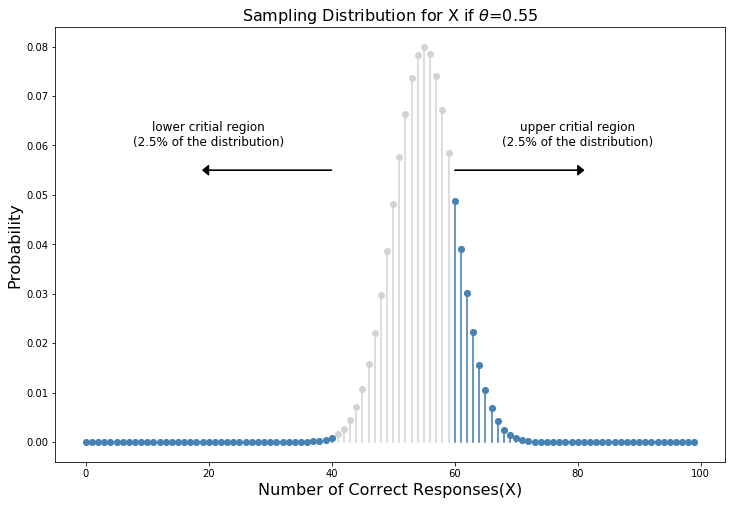

In [14]:
x=np.arange(0,100)
y=stats.binom.pmf(k=x, n=100, p=0.55)
x2=x[np.logical_or(x<=40, x>=60)]
z=stats.binom.pmf(k=x2, n=100, p=0.55)
fig=plt.figure(figsize=(12, 8))
#ax.set_prop_cycle(custom_cycler)
markerline, stemlines, baseline = plt.stem(x,y, markerfmt='o', basefmt=" ")
plt.setp(markerline, 'color', 'lightgrey')
plt.setp(stemlines, 'color', 'lightgrey')
markerline, stemlines, baseline = plt.stem(x2,z, markerfmt='o', basefmt=" ")
plt.setp(markerline, 'color', 'steelblue')
plt.setp(stemlines, 'color', 'steelblue')

plt.arrow(x=60, y=0.055, dx=20, dy=0,width=0.0001,head_width=0.002, head_length=1,color='k',capstyle='butt')
plt.arrow(x=40, y=0.055, dx=-20, dy=0,width=0.0001,head_width=0.002, head_length=1,color='k')
plt.text(80,0.06,"upper critial region\n(2.5% of the distribution)",horizontalalignment='center',fontsize=12)
plt.text(20,0.06,"lower critial region\n(2.5% of the distribution)", horizontalalignment='center',fontsize=12)
#plt.annotate("upper critical region", xy=(60, 0.04), xytext=(80, 0.04), arrowprops=dict(arrowstyle="->"))

plt.ylabel("Probability",fontsize=16)
plt.xlabel("Number of Correct Responses(X)",fontsize=16)
plt.title("Sampling Distribution for X if $\\theta$=0.55",fontsize=16)
#plt.show()


glue("crit3_fig",fig,display=False)

```{glue:figure} crit3_fig
:figwidth: 550px
:name: "fig:crit3"

Sampling distribution under the *alternative* hypothesis, for a population parameter value of $\\theta = 0.55$. A reasonable proportion of the distribution lies in the rejection region.
```

Let's take a moment to think about what a Type II error actually is. A Type II error occurs when the alternative hypothesis is true, but we are nevertheless unable to reject the null hypothesis. Ideally, we'd be able to calculate a single number $\beta$ that tells us the Type II error rate, in the same way that we can set $\alpha = .05$ for the Type I error rate. Unfortunately, this is a lot trickier to do. To see this, notice that in my ESP study the alternative hypothesis actually corresponds to lots of possible values of $\theta$. In fact, the alternative hypothesis corresponds to every value of $\theta$ *except* 0.5. Let's suppose that the true probability of someone choosing the correct response is 55\% (i.e., $\theta = .55$). If so, then the *true* sampling distribution for $X$ is not the same one that the null hypothesis predicts: the most likely value for $X$ is now 55 out of 100. Not only that, the whole sampling distribution has now shifted, as shown in {numref}`fig:crit3`. The critical regions, of course, do not change: by definition, the critical regions are based on what the null hypothesis predicts. What we're seeing in this figure is the fact that when the null hypothesis is wrong, a much larger proportion of the sampling distribution distribution falls in the critical region. And of course that's what should happen: the probability of rejecting the null hypothesis is larger when the null hypothesis is actually false!  However $\theta = .55$ is not the only possibility consistent with the alternative hypothesis. Let's instead suppose that the true value of $\theta$ is actually 0.7. What happens to the sampling distribution when this occurs? The answer, shown in {numref}`fig:crit4`, is that almost the entirety of the sampling distribution has now moved into the critical region. Therefore, if $\theta = 0.7$ the probability of us correctly rejecting the null hypothesis (i.e., the power of the test) is much larger than if $\theta = 0.55$. In short, while $\theta = .55$ and $\theta = .70$ are both part of the alternative hypothesis, the Type II error rate is different.

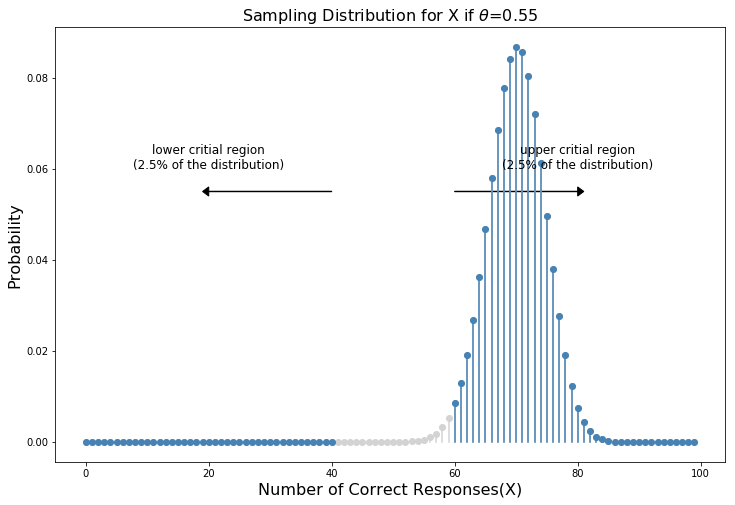

In [15]:
x=np.arange(0,100)
y=stats.binom.pmf(k=x, n=100, p=0.7)
x2=x[np.logical_or(x<=40, x>=60)]
z=stats.binom.pmf(k=x2, n=100, p=0.7)
fig=plt.figure(figsize=(12, 8))
#ax.set_prop_cycle(custom_cycler)
markerline, stemlines, baseline = plt.stem(x,y, markerfmt='o', basefmt=" ")
plt.setp(markerline, 'color', 'lightgrey')
plt.setp(stemlines, 'color', 'lightgrey')
markerline, stemlines, baseline = plt.stem(x2,z, markerfmt='o', basefmt=" ")
plt.setp(markerline, 'color', 'steelblue')
plt.setp(stemlines, 'color', 'steelblue')

plt.arrow(x=60, y=0.055, dx=20, dy=0,width=0.0001,head_width=0.002, head_length=1,color='k',capstyle='butt')
plt.arrow(x=40, y=0.055, dx=-20, dy=0,width=0.0001,head_width=0.002, head_length=1,color='k')
plt.text(80,0.06,"upper critial region\n(2.5% of the distribution)",horizontalalignment='center',fontsize=12)
plt.text(20,0.06,"lower critial region\n(2.5% of the distribution)", horizontalalignment='center',fontsize=12)
#plt.annotate("upper critical region", xy=(60, 0.04), xytext=(80, 0.04), arrowprops=dict(arrowstyle="->"))

plt.ylabel("Probability",fontsize=16)
plt.xlabel("Number of Correct Responses(X)",fontsize=16)
plt.title("Sampling Distribution for X if $\\theta$=0.55",fontsize=16)
#plt.show()

glue("crit4_fig",fig,display=False)



```{glue:figure} crit4_fig
:figwidth: 550px
:name: "fig:crit4"

Sampling distribution under the *alternative* hypothesis, for a population parameter value of $\theta = 0.70$. Almost all of the distribution lies in the rejection region.
```

What all this means is that the power of a test (i.e., $1-\beta$) depends on the true value of $\theta$. To illustrate this, I've calculated the expected probability of rejecting the null hypothesis for all values of $\theta$, and plotted it in {numref}`fig:power`. This plot describes what is usually called the **_power function_** of the test. It's a nice summary of how good the test is, because it actually tells you the power ($1-\beta$) for all possible values of $\theta$. As you can see, when the true value of $\theta$ is very close to 0.5, the power of the test drops very sharply, but when it is further away, the power is large. 

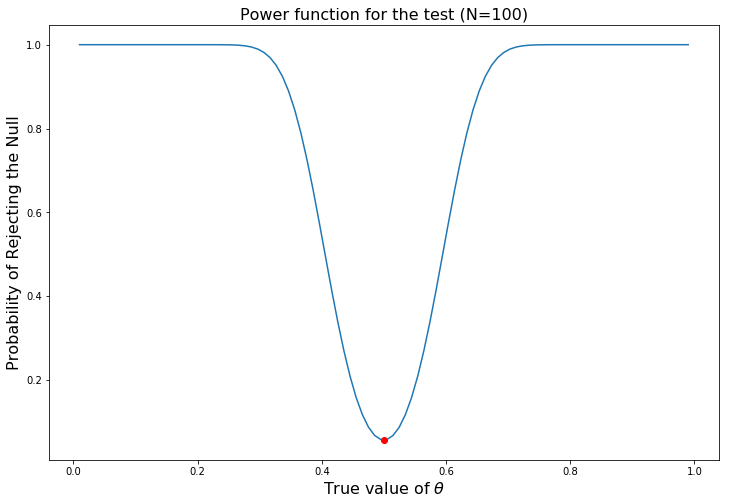

In [24]:
def powerintail(theta):
    return stats.binom.cdf(k=40,n=100, p=theta) + (1.0 - stats.binom.cdf(k=59,n=100, p=theta))

theta = np.linspace(.01,.99, 100)
power = np.zeros(len(theta))
for i in range(len(power)):
    power[i] = powerintail(theta[i])
    
fig=plt.figure(figsize=(12, 8))
plt.plot(theta,power)
plt.plot(0.5, powerintail(0.5),color='red',marker='o')
plt.ylabel("Probability of Rejecting the Null",fontsize=16)
plt.xlabel("True value of $\\theta$",fontsize=16)
plt.title("Power function for the test (N=100)",fontsize=16)
#plt.show()
glue("power_fig",fig,display=False)



```{glue:figure} power_fig
:figwidth: 550px
:name: "fig:power"

The probability that we will reject the null hypothesis, plotted as a function of the true value of $\theta$. Obviously, the test is more powerful (greater chance of correct rejection) if the true value of $\theta$ is very different from the value that the null hypothesis specifies (i.e., $\theta=.5$). Notice that when $\theta$ actually is equal to .5 (plotted as a red dot), the null hypothesis is in fact true: rejecting the null hypothesis in this instance would be a Type I error.
```

### Effect size

>*Since all models are wrong the scientist must be alert to what is importantly wrong. It is inappropriate to be concerned with mice when there are tigers abroad*
>
>-- George Box 1976

The plot shown in {numref}`fig:power` captures a fairly basic point about hypothesis testing. If the true state of the world is very different from what the null hypothesis predicts, then your power will be very high; but if the true state of the world is similar to the null (but not identical) then the power of the test is going to be very low. Therefore, it's useful to be able to have some way of quantifying how "similar" the true state of the world is to the null hypothesis. A statistic that does this is called a measure of **_effect size_** 
{cite}`Cohen1988`, {cite}`Ellis2010`. Effect size is defined slightly differently in different contexts, (and so this section just talks in general terms) but the qualitative idea that it tries to capture is always the same: how big is the difference between the *true* population parameters, and the parameter values that are assumed by the null hypothesis? In our ESP example, if we let $\theta_0 = 0.5$ denote the value assumed by the null hypothesis, and let $\theta$ denote the true value, then a simple measure of effect size could be something like the difference between the true value and null (i.e., $\theta - \theta_0$), or possibly just the magnitude of this difference,  $\mbox{abs}(\theta - \theta_0)$.


type | big effect size | small effect size
--- | --- |---
significant result | difference is real, and of practice importance | difference is real, but might not be interesting
non-significant result | no effect observed | no effect observed


Why calculate effect size? Let's assume that you've run your experiment, collected the data, and gotten a significant effect when you ran your hypothesis test. Isn't it enough just to say that you've gotten a significant effect? Surely that's the *point* of hypothesis testing? Well, sort of. Yes, the point of doing a hypothesis test is to try to demonstrate that the null hypothesis is wrong, but that's hardly the only thing we're interested in. If the null hypothesis claimed that $\theta = .5$, and we show that it's wrong, we've only really told half of the story. Rejecting the null hypothesis implies that we believe that $\theta \neq .5$, but there's a big difference between $\theta = .51$ and $\theta = .8$. If we find that $\theta = .8$, then not only have we found that the null hypothesis is wrong, it appears to be *very* wrong. On the other hand, suppose we've successfully rejected the null hypothesis, but it looks like the true value of $\theta$ is only .51 (this would only be possible with a large study). Sure, the null hypothesis is wrong, but it's not at all clear that we actually *care*, because the effect size is so small. In the context of my ESP study we might still care, since any demonstration of real psychic powers would actually be pretty cool^[Although in practice a very small effect size is worrying, because even very minor methodological flaws might be responsible for the effect; and in practice no experiment is perfect, so there are always methodological issues to worry about.], but in other contexts a 1\% difference isn't very interesting, even if it is a real difference. For instance, suppose we're looking at differences in high school exam scores between males and females, and it turns out that the female scores are 1\% higher on average than the males. If I've got data from thousands of students, then this difference will almost certainly be *statistically significant*, but regardless of how small the $p$ value is it's just not very interesting. You'd hardly want to go around proclaiming a crisis in boys education on the basis of such a tiny difference would you? It's for this reason that it is becoming more standard (slowly, but surely) to report some kind of standard measure of effect size along with the the results of the hypothesis test. The hypothesis test itself tells you whether you should believe that the effect you have observed is real (i.e., not just due to chance); the effect size tells you whether or not you should care.



Notice that the true population parameter $\theta$ doesn't necessarily correspond to an immutable fact of nature. In this context $\theta$ is just the true probability that people would correctly guess the colour of the card in the other room. As such the population parameter can be influenced by all sorts of things. Of course, this is all on the assumption that ESP actually exists!


### Increasing the power of your study

Not surprisingly, scientists are fairly obsessed with maximising the power of their experiments. We want our experiments to work, and so we want to maximise the chance of rejecting the null hypothesis if it is false (and of course we usually want to believe that it is false!) As we've seen, one factor that influences power is the effect size. So the first thing you can do to increase your power is to increase the effect size. In practice, what this means is that you want to design your study in such a way that the effect size gets magnified. For instance, in my ESP study I might believe that psychic powers work best in a quiet, darkened room; with fewer distractions to cloud the mind. Therefore I would try to conduct my experiments in just such an environment: if I can strengthen people's ESP abilities somehow, then the true value of $\theta$ will go up and therefore my effect size will be larger. In short, clever experimental design is one way to boost power; because it can alter the effect size.

Unfortunately, it's often the case that even with the best of experimental designs you may have only a small effect. Perhaps, for example, ESP really does exist, but even under the best of conditions it's very very weak. Under those circumstances, your best bet for increasing power is to increase the sample size. In general, the more observations that you have available, the more likely it is that you can discriminate between two hypotheses. If I ran my ESP experiment with 10 participants, and 7 of them correctly guessed the colour of the hidden card, you wouldn't be terribly impressed. But if I ran it with 10,000 participants and 7,000 of them got the answer right, you would be much more likely to think I had discovered something. In other words, power increases with the sample size. This is illustrated in {numref}`fig:powern`, which shows the power of the test for a true parameter of $\theta = 0.7$, for all sample sizes $N$ from 1 to 100, where I'm assuming that the null hypothesis predicts that $\theta_0 = 0.5$. 

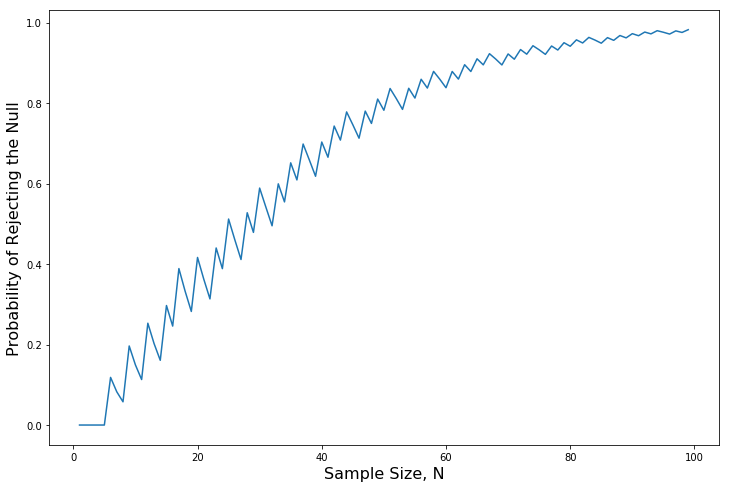

In [25]:
N = np.arange(1, 100)
power = np.zeros(len(N))
theta = 0.7
for i in range(len(power)):
    crit_low = stats.binom.ppf(q=0.025, n=N[i], p=0.5)-1
    crit_high = stats.binom.ppf(q=0.975, n=N[i], p=0.5)
    power[i] = stats.binom.cdf(k=crit_low, n=N[i], p=theta) + \
        (1.0 - stats.binom.cdf(k=crit_high, n=N[i], p=theta))
fig=plt.figure(figsize=(12, 8))
plt.plot(N, power)
plt.ylabel("Probability of Rejecting the Null", fontsize=16)
plt.xlabel("Sample Size, N", fontsize=16)
#plt.show()
glue("powern_fig",fig,display=False)

```{glue:figure} powern_fig
:figwidth: 550px
:name: "fig:powern"

The power of our test, plotted as a function of the sample size $N$. In this case, the true value of $\theta$ is 0.7, but the null hypothesis is that $\theta = 0.5$. Overall, larger $N$ means greater power. (The small zig-zags in this function occur because of some odd interactions between $\theta$, $\alpha$ and the fact that the binomial distribution is discrete; it doesn't matter for any serious purpose) .
```


 Because power is important, whenever you're contemplating running an experiment it would be pretty useful to know how much power you're likely to have. It's never possible to know for sure, since you can't possibly know what your effect size is. However, it's often (well, sometimes) possible to guess how big it should be. If so, you can guess what sample size you need! This idea is called **_power analysis_**, and if it's feasible to do it, then it's very helpful, since it can tell you something about whether you have enough time or money to be able to run the experiment successfully. It's increasingly common to see people arguing that power analysis should be a required part of experimental design, so it's worth knowing about. I don't discuss power analysis in this book, however. This is partly for a boring reason and partly for a substantive one. The boring reason is that I haven't had time to write about power analysis yet. The substantive one is that I'm still a little suspicious of power analysis. Speaking as a researcher, I have very rarely found myself in a position to be able to do one -- it's either the case that (a) my experiment is a bit non-standard and I don't know how to define effect size properly, (b) I literally have so little idea about what the effect size will be that I wouldn't know how to interpret the answers. Not only that, after extensive conversations with someone who does stats consulting for a living (my wife, as it happens), I can't help but notice that in practice the *only* time anyone ever asks her for a power analysis is when she's helping someone write a grant application. In other words, the only time any scientist ever seems to want a power analysis in real life is when they're being forced to do it by bureaucratic process. It's not part of anyone's day to day work. In short, I've always been of the view that while power is an important concept, power *analysis* is not as useful as people make it sound, except in the rare cases where (a) someone has figured out how to calculate power for your actual experimental design and (b) you have a pretty good idea what the effect size is likely to be. Maybe other people have had better experiences than me, but I've personally never been in a situation where both (a) and (b) were true. Maybe I'll be convinced otherwise in the future, and probably a future version of this book would include a more detailed discussion of power analysis, but for now this is about as much as I'm comfortable saying about the topic.

## Some issues to consider

What I've described to you in this chapter is the orthodox framework for null hypothesis significance testing (NHST). Understanding how NHST works is an absolute necessity, since it has been the dominant approach to inferential statistics ever since it came to prominence in the early 20th century. It's what the vast majority of working scientists rely on for their data analysis, so even if you hate it you need to know it. However, the approach is not without problems. There are a number of quirks in the framework, historical oddities in how it came to be, theoretical disputes over whether or not the framework is right, and a lot of practical traps for the unwary. I'm not going to go into a lot of detail on this topic, but I think it's worth briefly discussing a few of these issues.



### Bayesians versus frequentists

Earlier on in this chapter I was quite emphatic about the fact that you *cannot* interpret the $p$ value as the probability that the null hypothesis is true. NHST is fundamentally a frequentist tool  and as such it does not allow you to assign probabilities to hypotheses: the null hypothesis is either true or it is not. The Bayesian approach to statistics interprets probability as a degree of belief, so it's totally okay to say that there is a 10\% chance that the null hypothesis is true: that's just a reflection of the degree of confidence that you have in this hypothesis. You aren't allowed to do this within the frequentist approach. Remember, if you're a frequentist, a probability can only be defined in terms of what happens after a large number of independent replications (i.e., a long run frequency). If this is your interpretation of probability, talking about the "probability" that the null hypothesis is true is complete gibberish: a null hypothesis is either true or it is false. There's no way you can talk about a long run frequency for this statement. To talk about "the probability of the null hypothesis" is as meaningless as "the colour of freedom". It doesn't have one!

Most importantly, this *isn't* a purely ideological matter. If you decide that you are a Bayesian and that you're okay with making probability statements about hypotheses, you have to follow the Bayesian rules for calculating those probabilities. The key think I want to point out to you is the $p$ value is a *terrible* approximation to the probability that $H_0$ is true. If what you want to know is the probability of the null, then the $p$ value is not what you're looking for!



### Traps


As you can see, the theory behind hypothesis testing is a mess, and even now there are arguments in statistics about how it "should" work. However, disagreements among statisticians are not our real concern here. Our real concern is practical data analysis. And while the "orthodox" approach to null hypothesis significance testing has many drawbacks, even an unrepentant Bayesian like myself would agree that they can be useful if used responsibly. Most of the time they give sensible answers, and you can use them to learn interesting things. Setting aside the various ideologies and historical confusions that we've discussed, the fact remains that the biggest danger in all of statistics is *thoughtlessness*. I don't mean stupidity, here: I literally mean thoughtlessness. The rush to interpret a result without spending time thinking through what each test actually says about the data, and checking whether that's consistent with how you've interpreted it. That's where the biggest trap lies. 

To give an example of this, consider the following example (see {cite}`Gelman2006`). Suppose I'm running my ESP study, and I've decided to analyze the data separately for the male participants and the female participants. Of the male participants, 33 out of 50 guessed the color of the card correctly. This is a significant effect ($p = .03$). Of the female participants, 29 out of 50 guessed correctly. This is not a significant effect ($p = .32$). Upon observing this, it is extremely tempting for people to start wondering why there is a difference between males and females in terms of their psychic abilities. However, this is wrong. If you think about it, we haven't *actually* run a test that explicitly compares males to females. All we have done is compare males to chance (binomial test was significant) and compared females to chance (binomial test was non significant). If we want to argue that there is a real difference between the males and the females, we should probably run a test of the null hypothesis that there is no difference! We can do that using a different hypothesis test, but when we do that it turns out that we have no evidence that males and females are significantly different ($p = .54$). *Now* do you think that there's anything fundamentally different between the two groups? Of course not. What's happened here is that the data from both groups (male and female) are pretty borderline: by pure chance, one of them happened to end up on the magic side of the $p = .05$ line, and the other one didn't. That doesn't actually imply that males and females are different. This mistake is so common that you should always be wary of it: the difference between significant and not-significant is *not* evidence of a real difference -- if you want to say that there's a difference between two groups, then you have to test for that difference! 

The example above is just that: an example. I've singled it out because it's such a common one, but the bigger picture is that data analysis can be tricky to get right. Think about *what* it is you want to test, *why* you want to test it, and whether or not the answers that your test gives could possibly make any sense in the real world. 


## Summary

Null hypothesis testing is one of the most ubiquitous elements to statistical theory. The vast majority of scientific papers report the results of some hypothesis test or another. As a consequence it is almost impossible to get by in science without having at least a cursory understanding of what a $p$-value means, making this one of the most important chapters in the book.

## References

```{bibliography} ../../references.bib
:filter: docname in docnames
```